# Logistic Regression

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# If you have not yet installed sklearn (aka scikit-learn), now is the time
!pip install scikit-learn

# Import the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size to (12,6)
plt.rcParams['figure.figsize'] = (12,6)

In [5]:
# Import the dataset
df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [8]:
# Filter out one species
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [10]:
# Filterin the DataFrame
condition = df['species'] != 'Chinstrap'
df[condition] # return of all entries that don't belong to the species Chinstrap

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female


In [11]:
# Kick out the Chinstraps
df_binary = df[df['species'] != 'Chinstrap'].dropna().copy()
# .dropna() gets rid of null values
# .copy() makes sure that df_binary and df are not linked
df_binary.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


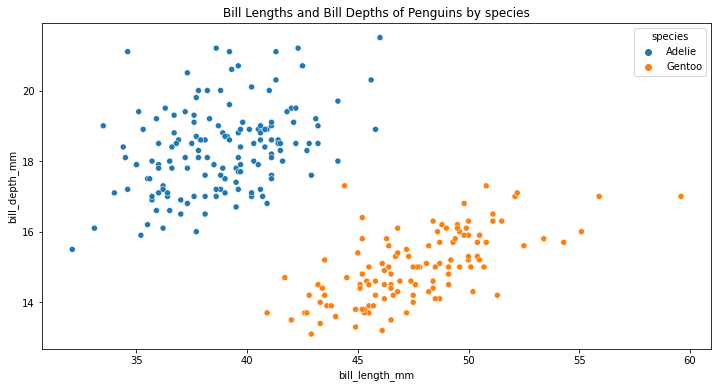

In [12]:
# Plot the Bill Depth of each penguin against its Bill Length
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df_binary,
               hue='species')
plt.title('Bill Lengths and Bill Depths of Penguins by species')
# plt.savefig('logisitc_regression_warmup_2.png')
plt.show()

# Implementation in code

In [13]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [14]:
# Define X, use the bill_length_mm and bill_depth_mm
X = df_binary[['bill_length_mm', 'bill_depth_mm']]

In [15]:
# Define y
y = df_binary['species']

In [16]:
# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) # We pass X and y into the function train_test_split

In [23]:
X_train.shape # 198 rows and 2 columns

(212, 2)

In [24]:
X_test.shape

(53, 2)

In [25]:
y_train.shape, y_test.shape

((212,), (53,))

In [19]:
X.shape

(265, 2)

In [26]:
# Create a model
m = LogisticRegression()

In [27]:
m

LogisticRegression()

In [28]:
# Train a model
m.fit(X_train, y_train) # This is the learning part

LogisticRegression()

In [32]:
X_train.head(1)
# X_train.iloc[0]

,bill_length_mm,bill_depth_mm
179,47.8,15.0


In [46]:
y_train.iloc[0]
# y_train[179]

'Gentoo'

In [34]:
# Use the model to make predictions on the seen data
first_penguin = X_train.head(1)

In [35]:
m.predict(first_penguin)

array(['Gentoo'], dtype=object)

In [36]:
m.predict(X_train)

array(['Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adel

In [39]:
# Look at the predicted probabilities
[[round(p0, 2), round(p1, 2)] for p0, p1 in m.predict_proba(X_train)]
# This is a list comprehension

# Equivalent:
# result = []
# for p0, p1 in m.predict_proba(X_train):
#    result.append([round(p0, 2), round(p1, 2)])

[[0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.42, 0.58],
 [0.87, 0.13],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.99, 0.01],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.97, 0.03],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.97, 0.03],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.01, 0.99],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.01, 0.99],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.97, 0.03],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.99, 0.01],
 [0.0, 1.0],
 [0.01, 0.99],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.99, 0.01],
 [0.0, 1.0],
 [0.96, 0.04],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 

In [40]:
# Is the model good?
m.score(X_train, y_train) # The score of the logistic regression gives us the ratio of 
# correct classifications/all observations

1.0

In [47]:
# Let's observe the model parameters
m.coef_ # [[w_1, w_2]]

array([[ 1.13144633, -1.74579624]])

In [48]:
w_0 = m.intercept_

array([-19.69302922])

In [49]:
# For advanced students, it could be interesting to check if the result of m.predict_proba(input)
# is the same as for sigmoid_function(input, parameters)
def sigmoid_function(culmen_length, culmen_depth, w_0, w_1, w_2):
    return 1/(1+np.exp(-(w_0 + w_1*culmen_length + w_2 * culmen_depth)))

## To-Dos for the afternoon:

### For me:

- Introduce you to the project dataset
- Push the updated notebooks
- Push the lecture notes

### For you:

- Continue working on the Challenge "Exploratory Data Analysis" in section 2.1 of the course material http://krspiced.pythonanywhere.com/chapters/project_titanic/ml_fundamentals/README.html#titanic-explore

- Challenge "Build a Logistic Regression Model" in section 2.3 of the course material
http://krspiced.pythonanywhere.com/chapters/project_titanic/logistic_regression/README.html#

### Bonus challenges:

- Look at 2.3.3 of the course material and try to fit a logistic regression using scikit-learn instead of statsmodels
http://krspiced.pythonanywhere.com/chapters/project_titanic/logistic_regression/README.html#example-using-statsmodels